In [101]:
%matplotlib notebook
import pandas as pd
import os
import glob
import matplotlib.pyplot as plot

In [102]:
# source: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/
# Data for 2017, North and South by Month
paths = ['../data/North_2017/', '../data/South_2017/']
#print(glob.glob(os.path.join(paths[0], '*.csv')))
all_files = (glob.glob(os.path.join(p, '*.csv')) for p in paths)

df_from_each_file = (pd.read_csv(f, skipinitialspace=True) for files in all_files for f in files)

concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df.head(10)

,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.60,12.36
1,1980,1,Goddard,N,15.05,11.88
2,1981,1,Goddard,N,15.11,11.85
3,1982,1,Goddard,N,15.34,12.13
4,1983,1,Goddard,N,15.16,11.94
5,1984,1,Goddard,N,14.69,11.62
6,1985,1,Goddard,N,14.96,11.64
7,1986,1,Goddard,N,15.12,11.82
8,1987,1,Goddard,N,15.28,11.84
9,1988,1,-9999,N,-9999.00,-9999.00


In [103]:
len(concatenated_df.index) # getting number of rows

922

In [104]:
list(concatenated_df)

['year', 'mo', 'data_type', 'region', 'extent', 'area']

In [105]:
def correct_month(month):
    if(month < 10):
        return '0' + str(month)
    else:
        return str(month)
concatenated_df['date'] = concatenated_df['mo'].apply(correct_month) + '-' + concatenated_df['year'].apply(str)
concatenated_df['date'] = pd.to_datetime(concatenated_df['date'], format='%m-%Y')

concatenated_df['month'] = concatenated_df['mo'] 
concatenated_df = concatenated_df[['data_type', 'region','extent', 'area', 'date', 'year', 'month']]

In [106]:
concatenated_df.head()

,data_type,region,extent,area,date,year,month
0,Goddard,N,15.60,12.36,1979-01-01,1979,1
1,Goddard,N,15.05,11.88,1980-01-01,1980,1
2,Goddard,N,15.11,11.85,1981-01-01,1981,1
3,Goddard,N,15.34,12.13,1982-01-01,1982,1
4,Goddard,N,15.16,11.94,1983-01-01,1983,1


In [107]:
concatenated_df['data_type'].unique()

array(['Goddard', '-9999', 'NRTSI-G'], dtype=object)

In [108]:
concatenated_df = concatenated_df[concatenated_df['data_type'] != '-9999']
concatenated_df.head()

,data_type,region,extent,area,date,year,month
0,Goddard,N,15.60,12.36,1979-01-01,1979,1
1,Goddard,N,15.05,11.88,1980-01-01,1980,1
2,Goddard,N,15.11,11.85,1981-01-01,1981,1
3,Goddard,N,15.34,12.13,1982-01-01,1982,1
4,Goddard,N,15.16,11.94,1983-01-01,1983,1


In [109]:
concatenated_df.set_index(['date'],inplace=True)

In [110]:
group_region_year_sorted = concatenated_df[['region', 'extent', 'area']].groupby(['region',concatenated_df.index.year], as_index=False).mean().apply(lambda x: x.sort_values(ascending=False))
group_region_year_sorted.head()

,region,extent,area
0,N,13.095000,9.920000
1,N,12.576667,9.381667
2,N,12.555000,9.326667
3,N,12.358333,9.085833
4,N,12.722500,9.469167


<IPython.core.display.Javascript object>


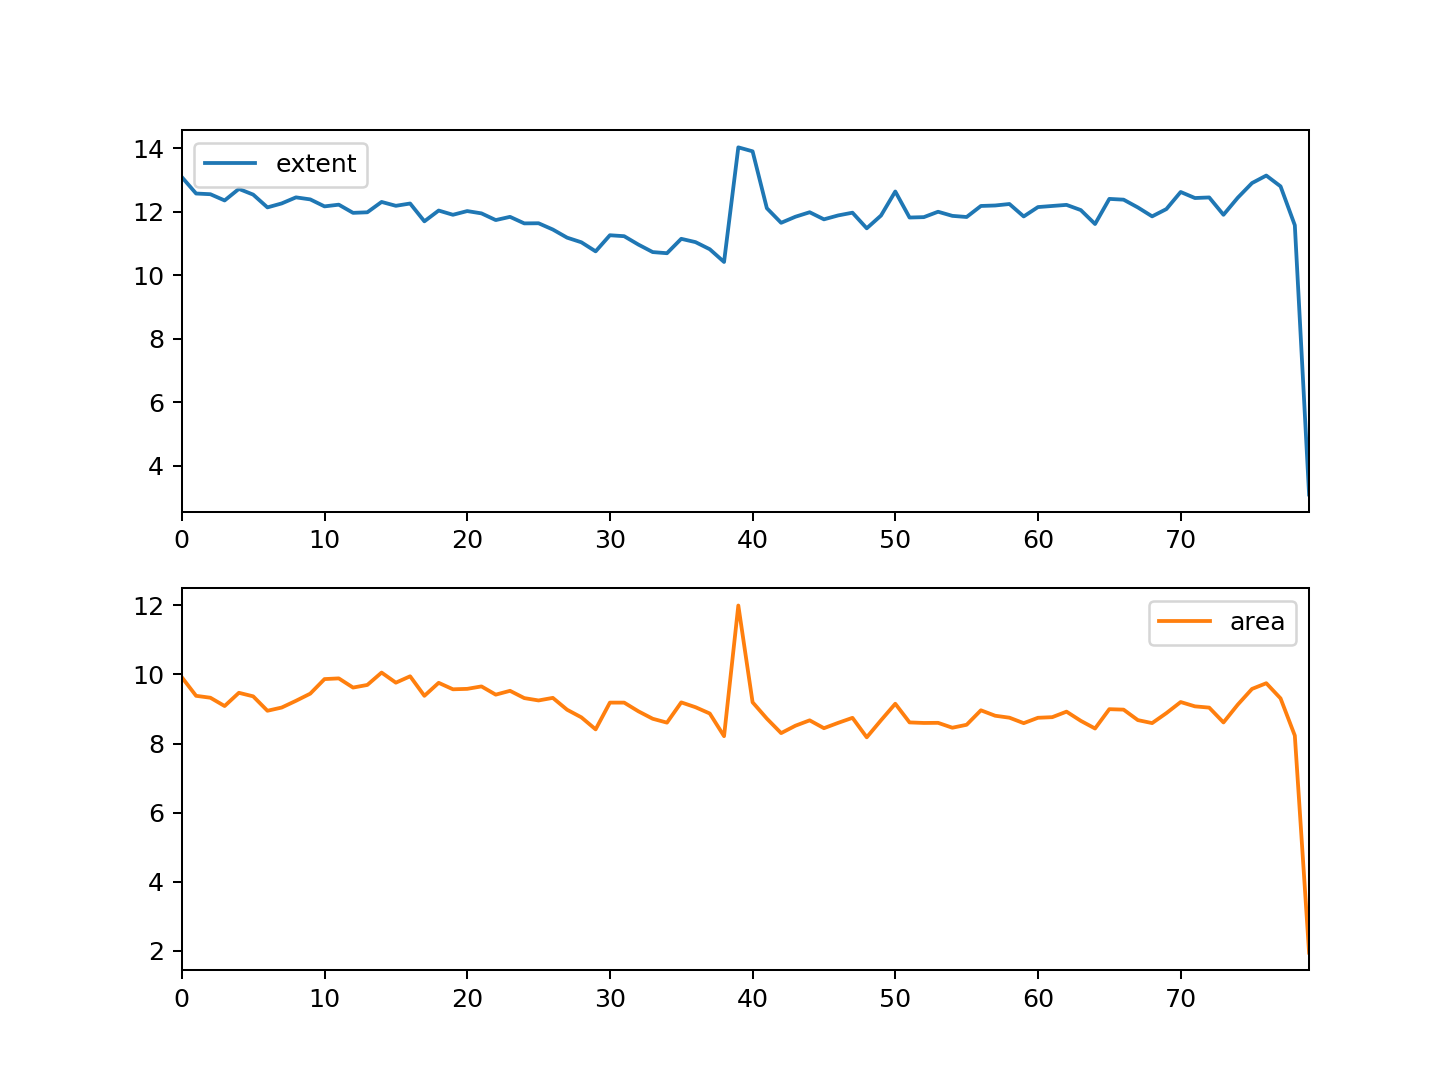

c:\users\danielmateuspires\coding\icy-polar-opposites\venv\lib\site-packages\pandas\tools\plotting.py:2470: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9B2AD7B00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001C9B2D559E8>], dtype=object)

In [111]:
fig, ax = plot.subplots(figsize=(8,6))

group_region_year_sorted.plot(ax=ax, subplots=True)

In [112]:
concatenated_df.head().to_json(orient = 'records')

'[{"data_type":"Goddard","region":"N","extent":15.6,"area":12.36,"year":1979,"month":1},{"data_type":"Goddard","region":"N","extent":15.05,"area":11.88,"year":1980,"month":1},{"data_type":"Goddard","region":"N","extent":15.11,"area":11.85,"year":1981,"month":1},{"data_type":"Goddard","region":"N","extent":15.34,"area":12.13,"year":1982,"month":1},{"data_type":"Goddard","region":"N","extent":15.16,"area":11.94,"year":1983,"month":1}]'

In [113]:
concatenated_df.to_json("../data/ice_nsidc.json",orient = 'records') # write to file